In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

np.random.seed(42)

In [9]:
df = pd.read_csv("data/course_page_actions.csv")
df

,timestamp,id,group,action,duration
0,2016-09-24 17:14:52.012145,261869,experiment,view,130.545004
1,2016-09-24 18:45:09.645857,226546,experiment,view,159.862440
2,2016-09-24 19:16:21.002533,286353,experiment,view,79.349315
3,2016-09-24 19:43:06.927785,842279,experiment,view,55.536126
4,2016-09-24 21:08:22.790333,781883,experiment,view,204.322437
...,...,...,...,...,...
4069,2017-01-18 09:39:08.046251,931490,control,view,58.846204
4070,2017-01-18 09:44:15.239671,410222,experiment,enroll,101.231821
4071,2017-01-18 09:56:26.948171,364458,control,view,293.490566
4072,2017-01-18 10:10:18.293253,443603,experiment,view,149.026959


In [11]:
views = df.query('action == "view"')
views

,timestamp,id,group,action,duration
0,2016-09-24 17:14:52.012145,261869,experiment,view,130.545004
1,2016-09-24 18:45:09.645857,226546,experiment,view,159.862440
2,2016-09-24 19:16:21.002533,286353,experiment,view,79.349315
3,2016-09-24 19:43:06.927785,842279,experiment,view,55.536126
4,2016-09-24 21:08:22.790333,781883,experiment,view,204.322437
...,...,...,...,...,...
4067,2017-01-18 08:35:44.813986,313521,control,view,131.677707
4069,2017-01-18 09:39:08.046251,931490,control,view,58.846204
4071,2017-01-18 09:56:26.948171,364458,control,view,293.490566
4072,2017-01-18 10:10:18.293253,443603,experiment,view,149.026959


In [6]:
reading_times = views.groupby(["id", "group"]).mean()
reading_times = reading_times.reset_index()
reading_times.head()

,id,group,duration
0,183260,control,107.331484
1,183615,experiment,24.627594
2,184277,experiment,193.212489
3,184360,experiment,226.586283
4,184589,experiment,12.052097


In [12]:
# Get dataframe with all records from control group
control_df = reading_times.query('group == "control"').duration.mean()
# Get dataframe with all records from experiment group
experiment_df = reading_times.query('group == "experiment"').duration.mean()
# Printing.
control_df, experiment_df

(115.38637100678429, 131.3208410471793)

In [13]:
obs_diff = experiment_df - control_df
obs_diff

15.934470040395013

The experiment group spend 15 more seconds on the course overview.

In [14]:
# Create sampling distribution for difference in completion rates
# with boostrapping
diffs = []
for _ in range(10000):
    sample = df.sample(df.shape[0], replace=True)
    sample_control_df = sample.query('group == "control"')
    sample_control_ctr = sample_control_df.query('group == "control"').duration.mean()
    sample_experiment_df = sample.query('group == "experiment"')
    sample_experiment_ctr = sample_experiment_df.query(
        'group == "experiment"'
    ).duration.mean()
    sample_obs_diff = sample_experiment_ctr - sample_control_ctr
    diffs.append(sample_obs_diff)

In [15]:
# convert to numpy array
diffs = np.array(diffs)

<Figure size 1008x432 with 0 Axes>

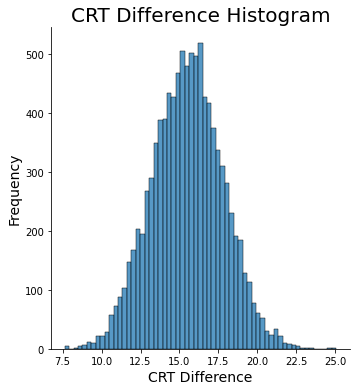

In [16]:
# plot distribution
# Plot sampling distribution
plt.figure(figsize=[14, 6])
sns.displot(diffs)
plt.title("CRT Difference Histogram", fontsize=20)
plt.xlabel("CRT Difference", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.show()

In [17]:
# create distribution under the null hypothesis
null_vals = np.random.normal(0, np.std(diffs), size=10000);

<Figure size 1008x432 with 0 Axes>

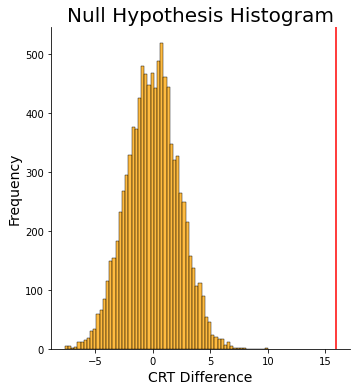

In [18]:
# plot null distribution
plt.figure(figsize=[14, 6])
sns.displot(null_vals, color="orange")
plt.title("Null Hypothesis Histogram", fontsize=20)
plt.xlabel("CRT Difference", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.axvline(obs_diff, color="red")
plt.show()

<Figure size 1008x432 with 0 Axes>

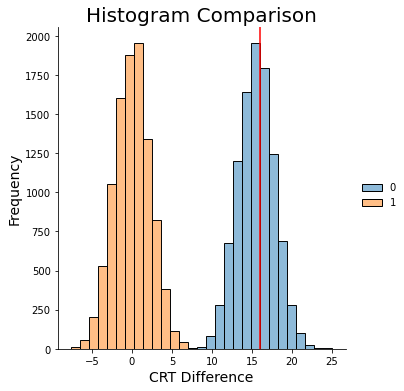

In [24]:
# Plot observed statistic with the null distibution
plt.figure(figsize=[14, 6])
sns.displot([diffs, null_vals], color=["r", "b"])
plt.title("Histogram Comparison", fontsize=20)
plt.xlabel("CRT Difference", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.axvline(obs_diff, color="red")
plt.show()

In [23]:
# Compute p-value
p_value = (null_vals > obs_diff).mean()
# Printting the p_value
p_value

0.0

>**Conclusion:** Reject the $H_0$ because p_value < $\alpha$